In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-05-20 10:35:17--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-05-20 10:35:18--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8529c0dce84bb45343ea27c39e.dl.dropboxusercontent.com/cd/0/inline/B8Z4vKrw0FjFD_d7um_X6ZRM4aWEFQurc_YTcr2cSxLHRVjTHI1mbCxl5XJ4EIfduA9dBG7uIPVQGSGuBxA4KVaSOKM2_2i2iQD2_Ay3w7axCzOrHt4Md3yJSU5svLmIgsrQT7DBtrGwjWf4G8vTEzut2zr-vCfrWn_XDuujFJupWQ/file# [following]
--2023-05-20 10:35:19--  https://uc8529c0dce84bb45343ea27c39e.dl.dropboxusercontent.com/cd/0/inline/B8Z4vKrw0FjFD_d7um_X6ZRM4aWEFQurc_YTcr2cSxLHRVjTHI1mbCxl5XJ4EIfduA9dBG7uIPVQ

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import  preprocess_input
from keras.losses import categorical_crossentropy

BUILDING THE MODEL TO TRAIN THE DATA

In [ ]:
base_model =  MobileNet(input_shape = (244,244, 3), include_top = False )

for layer in  base_model.layers:
  layer.trainable = False
x =Flatten()(base_model.output) 
x= Dense(units=7 , activation = 'softmax')(x)

#creating a model
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss =categorical_crossentropy, metrics = ['accuracy'])

Preparing the Data 

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, horizontal_flip = True, rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = "/content/train", target_size = (244,244) , batch_size=32,)

Found 28709 images belonging to 7 classes.


In [ ]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_data = val_datagen.flow_from_directory(directory ="/content/test", target_size = (244,244) , batch_size=32, )

Found 7178 images belonging to 7 classes.


DATA VISUALIZATION


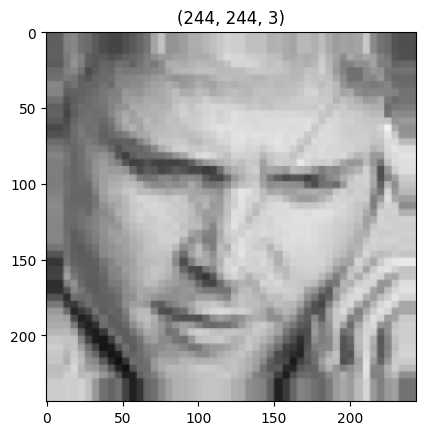

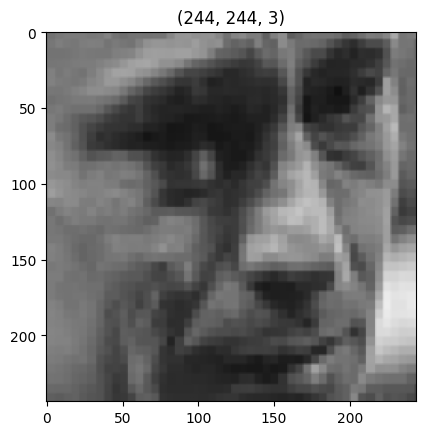

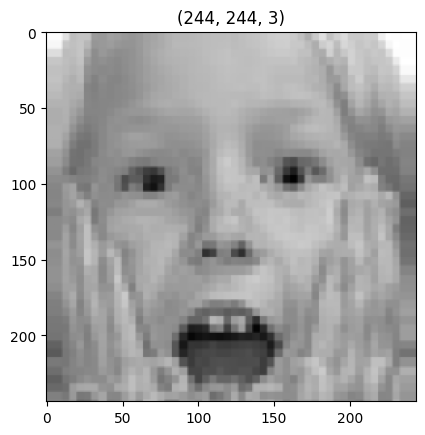

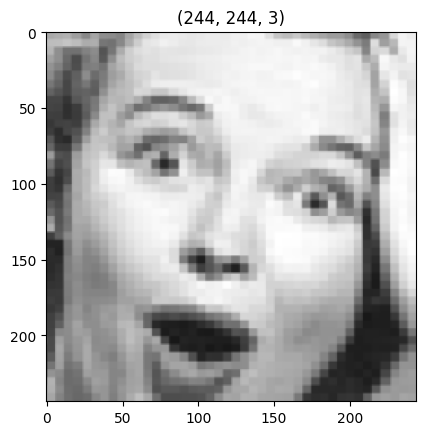

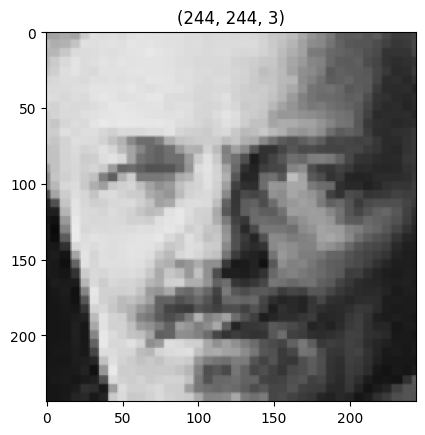

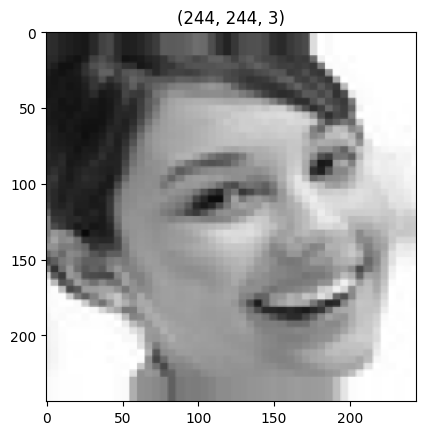

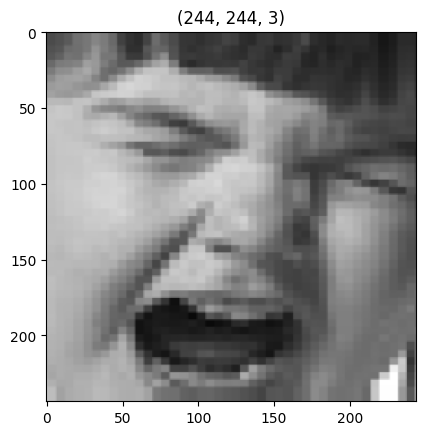

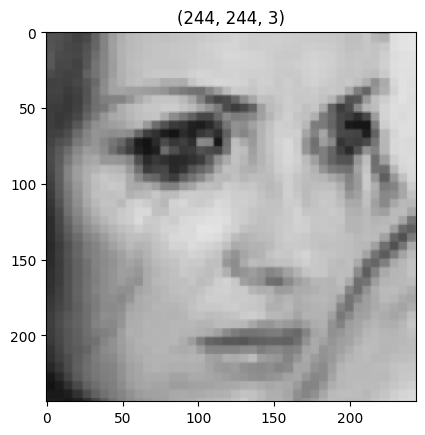

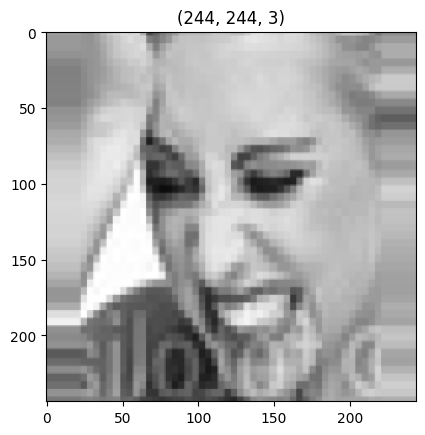

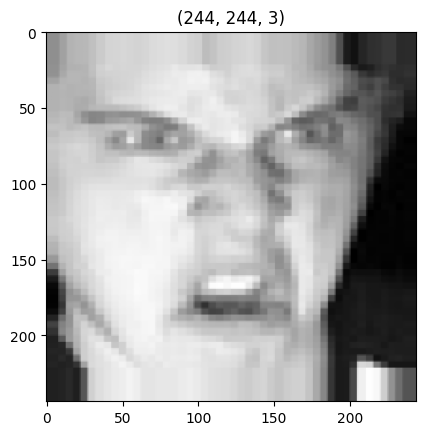

In [ ]:
t_img,label = train_data.next()

def Plotimage(img_arr, label):
  count=0
  for img, l in zip(img_arr,label):
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis = False
    plt.show()

    count = count +1
    if count == 10:
      break


Plotimage(t_img,label)


MODEL CHECK POINT TO APPLY EARLY STOPPING

In [ ]:
from  keras.callbacks import ModelCheckpoint, EarlyStopping

#for early stopping
es = EarlyStopping (monitor = 'val_accuracy',min_delta = 0.01, patience = 5, verbose = 1 ,mode='auto')

#for model checkpoint
ms =  ModelCheckpoint(filepath = "bestest_model.h5",monitor= 'val_accuracy', verbose = 1 , save_best_only = True ,mode='auto')
call_back = [es,ms]

In [ ]:
history = model.fit_generator(train_data, steps_per_epoch=10, epochs = 30, validation_data=val_data, validation_steps = 8,callbacks = [es,ms])

<ipython-input-11-2034b5ef28f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=10, epochs = 30, validation_data=val_data, validation_steps = 8,callbacks = [es,ms])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 19.2406 - accuracy: 0.1906
Epoch 1: val_accuracy improved from -inf to 0.36328, saving model to bestest_model.h5
10/10 [==============================] - 55s 6s/step - loss: 19.2406 - accuracy: 0.1906 - val_loss: 13.4553 - val_accuracy: 0.3633
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 13.4826 - accuracy: 0.3281
Epoch 2: val_accuracy did not improve from 0.36328
10/10 [==============================] - 42s 4s/step - loss: 13.4826 - accuracy: 0.3281 - val_loss: 9.6086 - val_accuracy: 0.3203
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.7752 - accuracy: 0.3562
Epoch 3: val_accuracy did not improve from 0.36328
10/10 [==============================] - 43s 4s/step - loss: 8.7752 - accuracy: 0.3562 - val_loss: 7.1197 - val_accuracy: 0.2969
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 8.1915 - accuracy: 0.3375
Epoch 4: val_accuracy improved from 0.36328 

In [ ]:
from keras.models import load_model
model =  load_model("/content/bestest_model.h5")

h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

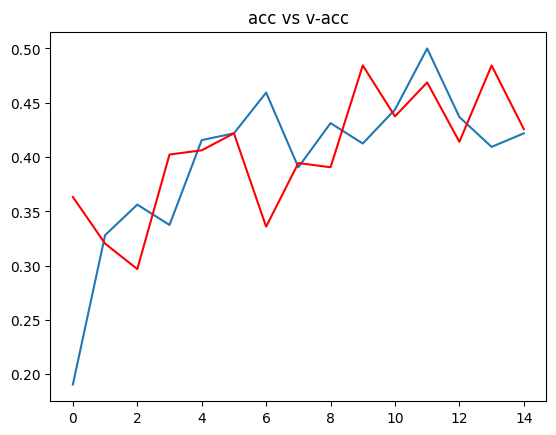

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c ="red")
plt.title("acc vs v-acc")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

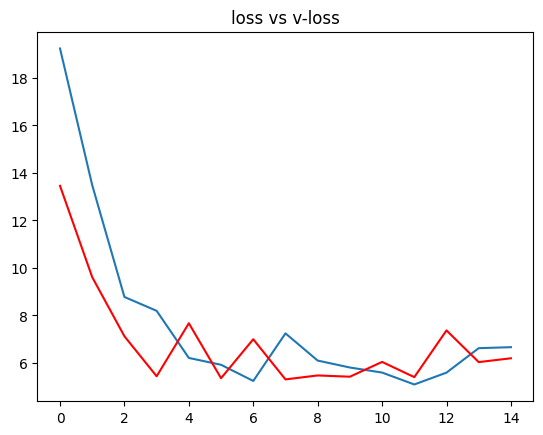

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c ="red")
plt.title("loss vs v-loss")
plt.show

1/1 [==============================] - 0s 70ms/step
 the image is of happy


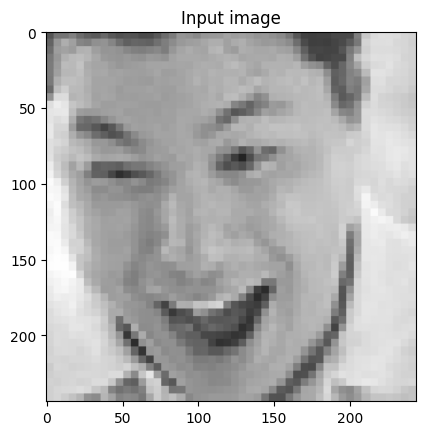

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

path = '/content/test/happy/PrivateTest_10736786.jpg'
img = load_img(path, target_size = (244,244))
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred  = np.argmax(model.predict(input_arr))
print(f" the image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title('Input image')
plt.show()